- basic Decision Tree
- then boosting or random forest

- regression and classification
- go thru workflow again

# Methods

A decision tree algorithm is a supervised learning method that can be applied to both classification and regression cases. As the algorithm does not require parameters, the tree's structure depends on rules of decision- making (consisting of statements of conditions and outcomes) that will be used to infer the values of target variables.

Next para..

In this section, we will observe how a decision tree will classify the origin country of a song and determine the highest position of a song based on other independent variables.

# Class Distribution

In [43]:
import pandas as pd
import numpy as np

import seaborn as sns 
import matplotlib.pyplot as plt

from sklearn import tree
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score

from sklearn.model_selection import train_test_split

appledf = pd.read_csv("../websitedata/apple_py.csv")

newAppledf = pd.read_csv("../websitedata/newApple_py.csv")

In [44]:
# DT Classification
appledf["Country"] = appledf["Country"].replace({"US": "Inside"})
appledf["Country"] = appledf["Country"].mask(appledf["Country"] != "Inside", "Outside")
y1 = appledf["Country"]
#y1=np.array(yOne)

xOne = newAppledf.drop(columns="Peak")
x1 = np.array(xOne)
print(appledf)

     Unnamed: 0  Chart Position                     Artist and Title  \
0             0               1        Doja Cat - Paint The Town Red   
1             1               2                  Tate McRae - greedy   
2             2               3                        Drake - IDGAF   
3             3               4         Drake - First Person Shooter   
4             4               5               Drake - Virginia Beach   
..          ...             ...                                  ...   
831       11747               7          Taylor Swift - Cruel Summer   
832       11770              30  Billie Eilish - What Was I Made For   
833       11773              33             Taylor Swift - Anti-Hero   
834       11802              62                 Taylor Swift - Lover   
835       11810              70                      SZA - Kill Bill   

     Position Duration  Peak  (x?)  Points  Country  Country Rank  
0                   68     1    45   16920   Inside          29.0  

In [45]:
# DT Regression

y2 = appledf["Peak"]
#y2=np.array(yTwo)

xTwo= newAppledf.drop(columns="Peak")
x2 = np.array(xTwo)
print(newAppledf)

     Unnamed: 0  Chart Position  Position Duration  Peak  (x?)  Points  \
0             0               1                 68     1    45   16920   
1             1               2                 27     2     9   14619   
2             2               3                  6     3     1   13364   
3             3               4                  6     3     2   12624   
4             4               5                  6     2     2   12359   
..          ...             ...                ...   ...   ...     ...   
831         831               7                245     1    13   10731   
832         832              30                 90     2    10    5425   
833         833              33                356     1    50    5108   
834         834              62                412     3    13    2739   
835         835              70                307     1     3    2487   

     Country Rank  
0              29  
1              44  
2               1  
3               2  
4          

# Class Distribution

In [46]:
X1 = x1
y1 = y1

X2 = x2
y2 = y2

print(X1.shape)
print(y1.shape)
print(X2.shape)
print(y2.shape)

(836, 6)
(836,)
(836, 6)
(836,)


In [85]:
# split dataset into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size = 0.20, random_state = 1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(668, 6) (168, 6) (668,) (168,)


In [86]:
# Class Distributions
classes = ["Inside", "Outside"]
props = (y_train.value_counts() / len(y_train)).to_list()
print("Class Distribution\n", y_train.value_counts(), sep = '')
print("\nClass Distribution\n", props, sep = '')

# dominant class
dominant_class = classes[props.index(max(props))]
print("\nDominant Class:", dominant_class)

Class Distribution
Country
Outside    654
Inside      14
Name: count, dtype: int64

Class Distribution
[0.9790419161676647, 0.020958083832335328]

Dominant Class: Inside


In [49]:
# split dataset into training and testing sets (80-20 split)
#X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size = 0.20, random_state = 1)
#print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(668, 6) (168, 6) (668,) (168,)


# Baseline Model for Comparison

In [87]:
import numpy as np
import random
from collections import Counter
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score
from sklearn.metrics import precision_recall_fscore_support

In [88]:
# function to print confusion matrix and other results
def confusion_plot(title, y_data, y_pred):
    
    # create the confusion matrix and display
    confusion = confusion_matrix(y_data, y_pred, labels = ["Inside", "Outside"])
    disp = ConfusionMatrixDisplay(confusion_matrix = confusion, display_labels = ["Inside", "Outside"])
    disp = disp.plot(cmap = plt.cm.Blues, values_format = 'g')

    # report performance metrics
    print("Accuracy:", accuracy_score(y_data, y_pred))
    print("Inside Recall    (Y = 'Inside'):", round(recall_score(y_data, y_pred, pos_label = 'Inside'), 4))
    print("Inside Precision (Y = 'Inside'):", round(precision_score(y_data, y_pred, pos_label = 'Inside'), 4))
    print("Outside Recall    (Y = 'Outside'):", round(recall_score(y_data, y_pred, pos_label = 'Outside'), 4))
    print("Outside Precision (Y = 'Outside'):", round(precision_score(y_data, y_pred, pos_label = 'Outside'), 4))


    # display the confusion matrix
    plt.title(title)
    plt.show()

In [89]:
# get class imbalance proportions
inside_percent = props[1]

# training data
uniforms = np.random.uniform(size = len(y_train))
yp_train = [("Inside" if uniform < inside_percent else "Outside") for uniform in uniforms]

# testing data
uniforms = np.random.uniform(size = len(y_test))
yp_test = [("Inside" if uniform < inside_percent else "Outside") for uniform in uniforms]

Accuracy: 0.9565868263473054
Inside Recall    (Y = 'Inside'): 0.0
Inside Precision (Y = 'Inside'): 0.0
Outside Recall    (Y = 'Outside'): 0.9771
Outside Precision (Y = 'Outside'): 0.9786


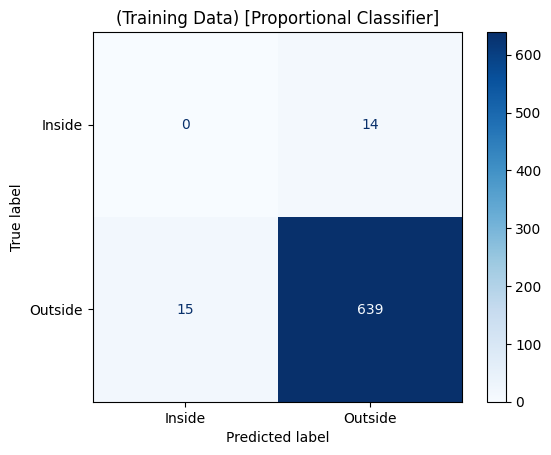

Accuracy: 0.9821428571428571
Inside Recall    (Y = 'Inside'): 0.0
Inside Precision (Y = 'Inside'): 0.0
Outside Recall    (Y = 'Outside'): 0.994
Outside Precision (Y = 'Outside'): 0.988


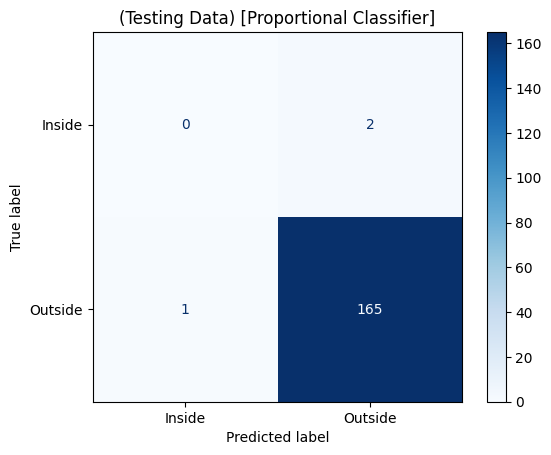

In [90]:
from sklearn.metrics import confusion_matrix

confusion_plot('(Training Data) [Proportional Classifier]', y_data = y_train, y_pred = yp_train)
confusion_plot('(Testing Data) [Proportional Classifier]', y_data = y_test, y_pred = yp_test)

# Maybe Feature Selection bc Optional

In [100]:
# construct the model
tree_model = tree.DecisionTreeClassifier()
tree_model = tree_model.fit(X = X_train, y = y_train)

# predict on the train and test data
yp_train = tree_model.predict(X_train)
yp_test = tree_model.predict(X_test)

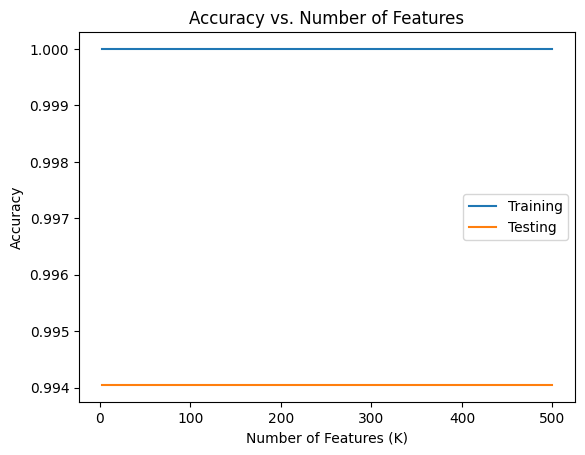

In [102]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

# create some helpful vectors
training_accuracy, testing_accuracy = [], []
piece1 = np.linspace(2, 200, 100).astype(int)
piece2 = np.linspace(210, 500, 30).astype(int)
K_values = np.concatenate((piece1, piece2), axis = 0)

for k in K_values:
    # select best k features
    X = X1
    y = y1
    X_new = SelectKBest(chi2, k = "all").fit_transform(X, y)
    
    # split dataset into training and testing sets (80-20 split)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 1)

    # fit the model
    tree_model = tree_model.fit(X = X_train, y = y_train)

    # predict on the train and test data
    yp_train = tree_model.predict(X_train)
    yp_test = tree_model.predict(X_test)

    # append accuracies to vectors
    training_accuracy.append(accuracy_score(y_train, yp_train))
    testing_accuracy.append(accuracy_score(y_test, yp_test))

# plot the training and testing accuracy against the number of features used
plt.plot(K_values, training_accuracy, label = 'Training')
plt.plot(K_values, testing_accuracy, label = 'Testing')
plt.xlabel('Number of Features (K)'), plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of Features')
plt.legend()
plt.show()

# Hyperparameter Tuning 

In [93]:
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeClassifier

x_train = X_train
x_test = X_test

# HYPER PARAMETER SEARCH FOR OPTIMAL NUMBER OF NEIGHBORS 
hyper_param=[]
train_error=[]
test_error=[]

# LOOP OVER HYPER-PARAM
for i in range(1,40):
    # INITIALIZE MODEL 
    model = DecisionTreeClassifier(max_depth=i)

    # TRAIN MODEL 
    model.fit(x_train,y_train)

    # OUTPUT PREDICTIONS FOR TRAINING AND TEST SET 
    yp_train = model.predict(x_train)
    yp_test = model.predict(x_test)

    # shift=1+np.min(y_train) #add shift to remove division by zero 
    err1=accuracy_score(y_train, yp_train) 
    err2=accuracy_score(y_test, yp_test) 
    
    # err1=100.0*np.mean(np.absolute((yp_train-y_train)/y_train))
    # err2=100.0*np.mean(np.absolute((yp_test-y_test)/y_test))

    hyper_param.append(i)
    train_error.append(err1)
    test_error.append(err2)

    if(i==1 or i%10==0):
        print("hyperparam =",i)
        print(" train error:",err1)
        print(" test error:" ,err2)

hyperparam = 1
 train error: 1.0
 test error: 0.9940476190476191
hyperparam = 10
 train error: 1.0
 test error: 0.9940476190476191
hyperparam = 20
 train error: 1.0
 test error: 0.9940476190476191
hyperparam = 30
 train error: 1.0
 test error: 0.9940476190476191


In [ ]:
# select best k features
X_new = SelectKBest(chi2, k = 200).fit_transform(X, y)
# split dataset into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size = 0.20, random_state = 1)

# depths are [1, 2, ... , 40]
max_depths = np.linspace(1, 60, 60).astype(int)
# splits are [2, 3, ... , 11]
min_splits = np.linspace(2, 11, 10).astype(int)

# create training and testing accuracy matrices
training_accuracy, testing_accuracy = np.zeros((len(max_depths), len(min_splits))), np.zeros((len(max_depths), len(min_splits)))

for depth in max_depths:

    for min_split in min_splits:

        # fit the model
        tree_model = tree.DecisionTreeClassifier(max_depth = depth, min_samples_split = min_split)
        tree_model = tree_model.fit(X = X_train, y = y_train)

        # predict on the train and test data
        yp_train = tree_model.predict(X_train)
        yp_test = tree_model.predict(X_test)

        # append accuracies in correct matrix positions
        training_accuracy[depth - 1][min_split - 2] = accuracy_score(y_train, yp_train)
        testing_accuracy[depth - 1][min_split - 2] = accuracy_score(y_test, yp_test)

# plot the training and testing accuracies against the maxiumum depth and minimum split parameter choices
plt.plot(max_depths, training_accuracy[:,0], label = 'min_split = 2 (Train)')
plt.plot(max_depths, testing_accuracy[:,0], linestyle = '--', label = 'min_split = 2 (Test)')
plt.plot(max_depths, training_accuracy[:,1], label = 'min_split = 3 (Train)')
plt.plot(max_depths, testing_accuracy[:,1], linestyle = '--', label = 'min_split = 3 (Test)')
plt.plot(max_depths, training_accuracy[:,8], label = 'min_split = 10 (Train)')
plt.plot(max_depths, testing_accuracy[:,8], linestyle = '--', label = 'min_split = 10 (Test)')
plt.xlabel('Maximum Depth'), plt.ylabel('Accuracy')
plt.title('Accuracy vs. Maximum Depth')
plt.legend()
plt.show()

# Final Results

Report, discuss, and visualize the results of the final optimally-fit model. For example, final training & validation errors, confusion matrices (values and plots), plots of the decision tree, etc. Comment on the quality of fit, why it might be good or bad, and what might be done to improve it.

Will have to edit this dataset.

# Conclusions

Create two or more paragraphs, more is fine, that discuss in a NON-TECHNICAL way what was discovered, why it was important, things that went wrong, possible future directions, and what it all means for a general audience.